> # LECTURE - 01
>
> ### INTRODUCTION TO LINEAR REGRESSION: STOCK PREDICTION<br><br>


<pre>
- The Idea of the regression is to take continuous data and 
  figure out the best fit line for that data.

- With Linear Regression, we try to model our data with a straight line.

- Equation of the stringht line is: y = mx + c
    if we have x, we can figure out y given that we have m and c

- Basically the whole point of the regresion is to find out what m and c is.
</pre>


<pre>
- With ML, especially with Supervised ML, everything boils down to Features(are Attributes, in the below case it is continous data)
  and Lebels.
</pre>


In [1]:
import math
import quandl
import datetime
import numpy as np
import pandas as pd
from matplotlib import style
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, model_selection, svm

In [2]:
style.use('ggplot')

In [3]:
df = quandl.get('WIKI/GOOGL')
print(df.head())

              Open    High     Low    Close      Volume  Ex-Dividend  \
Date                                                                   
2004-08-19  100.01  104.06   95.96  100.335  44659000.0          0.0   
2004-08-20  101.01  109.08  100.50  108.310  22834300.0          0.0   
2004-08-23  110.76  113.48  109.05  109.400  18256100.0          0.0   
2004-08-24  111.24  111.60  103.57  104.870  15247300.0          0.0   
2004-08-25  104.76  108.00  103.88  106.000   9188600.0          0.0   

            Split Ratio  Adj. Open  Adj. High   Adj. Low  Adj. Close  \
Date                                                                   
2004-08-19          1.0  50.159839  52.191109  48.128568   50.322842   
2004-08-20          1.0  50.661387  54.708881  50.405597   54.322689   
2004-08-23          1.0  55.551482  56.915693  54.693835   54.869377   
2004-08-24          1.0  55.792225  55.972783  51.945350   52.597363   
2004-08-25          1.0  52.542193  54.167209  52.100830   53.1

<li>In Machine Learning, We can have all the features we want but we need to have only some meaningful features, features that actually have to do something with our data.</li>


In [4]:
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]
print(df.head)

<bound method NDFrame.head of               Adj. Open    Adj. High     Adj. Low   Adj. Close  Adj. Volume
Date                                                                       
2004-08-19    50.159839    52.191109    48.128568    50.322842   44659000.0
2004-08-20    50.661387    54.708881    50.405597    54.322689   22834300.0
2004-08-23    55.551482    56.915693    54.693835    54.869377   18256100.0
2004-08-24    55.792225    55.972783    51.945350    52.597363   15247300.0
2004-08-25    52.542193    54.167209    52.100830    53.164113    9188600.0
...                 ...          ...          ...          ...          ...
2018-03-21  1092.570000  1108.700000  1087.210000  1094.000000    1990515.0
2018-03-22  1080.010000  1083.920000  1049.640000  1053.150000    3418154.0
2018-03-23  1051.370000  1066.780000  1024.870000  1026.550000    2413517.0
2018-03-26  1050.600000  1059.270000  1010.580000  1054.090000    3272409.0
2018-03-27  1063.900000  1064.540000   997.620000  1006.94

In [7]:
# Percentage change in High to Low stock price:
# This is almost percent votatility of the day
# Therefore, we are gonna to define a new column: "H2L_PerCng"

df['H2L_PerCng'] = (df['Adj. High'] - df['Adj. Close']) / (df['Adj. Close'] * 100.0)

In [8]:
# (Features)
# Daily Percentage change or the daily move in Close to Open stock price:
# Normally the Percent Change is => ((New - Old) / (Old)) * 100

df['Per_Cng'] = (df["Adj. Close"] - df['Adj. Open']) / df['Adj. Open'] * 100.0

In [9]:
# (Features)
# Defining the new dataframe, we want to work with or we do really care about:

df = df[['Adj. Close', 'H2L_PerCng', 'Per_Cng', 'Adj. Volume']]

print(df.head())

            Adj. Close  H2L_PerCng   Per_Cng  Adj. Volume
Date                                                     
2004-08-19   50.322842    0.000371  0.324968   44659000.0
2004-08-20   54.322689    0.000071  7.227007   22834300.0
2004-08-23   54.869377    0.000373 -1.227880   18256100.0
2004-08-24   52.597363    0.000642 -5.726357   15247300.0
2004-08-25   53.164113    0.000189  1.183658    9188600.0


<br><br>

> # LECTURE - 02
>
> ### Features and Labels:
>
> Usually we define features by capital X and labels by small y.<br><br>


In [10]:
# It is just a variable created to work with the stock prices:
forecast_col = 'Adj. Close'


# Just in case there is not missing data
# In case of missing data and we can't get rid of it, so we fill that column with some specific values:
df.fillna(-9999, inplace=True)
# We did this because, with ML we can't work with NaN data,
# therefore we actually have to replace the NaN with something, or
# we can get rid of the entire column.


# Actually we are trying to predict the 10% of the dataframe to predict the forecast out:
forecast_out = int(math.ceil(0.01 * len(df)))
print(f'forecast_out is: {forecast_out} \n\n')

# Creating label:
# Since we have forecast_out, so we can create labels
# Here we are using forecast_out as minus that's why we made it as int data type
# So, basically we are shifting the columns negativelly upwards.
df['label'] = df[forecast_col].shift(-forecast_out)
# This way, each row, the label column for each row will be adjusted close price 10 days into the future.
# So, that's our label.


# So, this will just print first five rows of the dataframes
print(f'dataframe head is:\n {df.head()}\n\n')

df.dropna(inplace=True)

print(f'dataframe tail is:\n {df.tail()}')

forecast_out is: 35 


dataframe head is:
             Adj. Close  H2L_PerCng   Per_Cng  Adj. Volume      label
Date                                                                
2004-08-19   50.322842    0.000371  0.324968   44659000.0  69.078238
2004-08-20   54.322689    0.000071  7.227007   22834300.0  67.839414
2004-08-23   54.869377    0.000373 -1.227880   18256100.0  68.912727
2004-08-24   52.597363    0.000642 -5.726357   15247300.0  70.668146
2004-08-25   53.164113    0.000189  1.183658    9188600.0  71.219849


dataframe tail is:
             Adj. Close  H2L_PerCng   Per_Cng  Adj. Volume    label
Date                                                              
2018-01-30     1177.37    0.000090 -0.029718    1792602.0  1094.00
2018-01-31     1182.22    0.000035 -0.134312    1643877.0  1053.15
2018-02-01     1181.59    0.000050  0.476195    2774967.0  1026.55
2018-02-02     1119.20    0.000108 -0.729098    5798880.0  1054.09
2018-02-05     1068.76    0.000433 -2.893850    37

<br><br>

> # LECTURE - 03
>
> ### Training and Testing: <br><br>


<li>Scaling our data aspect is usually done on the features.</li>
<li>The goal is often to get our features to be somewhere between -1 and +1</li>
<li>This can actaully just help with accuracy as well as just processing speed or how long it might take to actually do the calculations.</li>
<br>

<li>Here, we are gonna to use cross-validation to create our training and testing samples. It's a good way to split up our data, suffle it up.</li>


In [16]:
# so, our features are basically everything, except for the label column.
# We can do this beacause df.drop() return new dataframes and
# it can be converted to numpy array and here it is being saved to the value of the X.
X = np.array(df.drop(['label'], axis=1))


# redefining X, this includes all the point because we have shifted
# So, we are actually making sure that we only have X's where we have values for 'y'
# X = X[:-forecast_out]
# We actually don't need to do it again, as we have already droped it above.


# Now, we are going to scale X
X = preprocessing.scale(X)


# Now we need to drop the missing data before creating the labels:
# df.dropna(inplace=True)


# Creating the labels:
# Now the value of y is our labels :
y = np.array(df['label'])


print(len(X), len(y))

3389 3389


In [17]:
# Since, we got our X's and 'y'
# therefore we are now ready for creating our training and testing sets.
# Creating training and testing set of data(hopefully here we are using 20% of total data)
# X_test and y_test we used to fit our classifier.
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.2)
# We use, X_train and y_train, to fit our classifiers.


# Stuff that is actually goinig to predict against:
X_lately = X[-forecast_out:]
X = X[:-forecast_out]
# So, now we have X, we need to figure out what m and C would be for straight line
# We get the answer for 'y'. We have done the linear regression.


# Now we need to define the classifier
clf = LinearRegression()


# Now to fit or train our classifier, we just fit our classifier
# fit is synonymous with train
clf.fit(X_train, y_train)


# Now we need to see out what the accuracy is
# score is synonymous with test
accuracy = clf.score(X_test, y_test)


print(f'Linear Regression Model Accuracy is: {accuracy}')

Linear Regression Model Accuracy is: 0.9782290061504728


In [18]:
# Switching The Algorithm From Linear Regression to SVM
# Let's now we try to use a different algorithm: SVM, just for testing
# Default value of kernel in the SVR() is 'linear', we can also use 'poly' as well:
# clf = svm.SVR(kernel = 'poly')

clf = svm.SVR()

clf.fit(X_train, y_train)

accuracy = clf.score(X_test, y_test)

print(f'SVM Model Accuracy is: {accuracy}')

SVM Model Accuracy is: 0.8056112850123274


<br><br>

> # LECTURE - 04
>
> ### Forecasting and Predicting: <br><br>


The parameter 'n_jobs' means that how many jobs or how many threads we are willing to run at any given time.

And the default for regression is 1.

'clf = LinearRegression()' => this is running in linealy. <br>
'clf = LinearRegression(n_jobs = 10)' => this will run atleast 10 jobs at a time, parallelly. <br>

'clf = LinearRegression(n_jobs = -1)' => this will run as many jobs as possible by our processor.


In [19]:
# Now, we need to predict based on the X data that we got.
# The way we can do this, once we have a classifier doing a prediction becomes really easy.

# here in the 'predict()' we can pass a single value or an array of value to make a prediction per value in that array
forecast_set = clf.predict(X_lately)


# printing the forecast set of last approx 30 days that what 'X_lately' returns.
print(f'forecast_set is: \n{forecast_set}\n\n Accuracy is: {accuracy}\n\n forecast_out is: {forecast_out}\n\n')
# These are the next approx 30 to 35 days of unknown values for us.

forecast_set is: 
[689.25423585 667.34496585 655.24028134 676.1846809  667.61699994
 678.76252218 678.71042443 677.71677727 676.90412629 678.06835944
 690.68359069 596.67910915 613.0813053  671.68908954 654.26446325
 661.23048515 652.7018923  657.69512429 657.39201708 572.29403106
 594.32177662 631.69576289 643.69180202 627.25563248 566.88800997
 616.17461742 576.45094853 616.52071314 602.27176633 613.0043385
 621.44790794 617.66271827 618.11022887 618.10147122 390.68960766]

 Accuracy is: 0.8056112850123274

 forecast_out is: 35




In [20]:
# This specifies that the entire column is just full of a Not a Number Data:
df['forecast'] = np.nan

In [21]:
# Finding the last date and getting the name of that by hardcoding it:
last_date = df.iloc[-1].name

last_unix = last_date.timestamp()

one_day = 86400

# The next day
next_unix = last_unix + one_day

In [22]:
# Now that we got the dates and next we need to populate the dataframe with new dates and forecast values.

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns) - 1)] + [i]

# Here we are iterating through the forecast set, taking each forecast day and
# then setting those as the values in the dataframe.
# Basically making a future features and not a number.

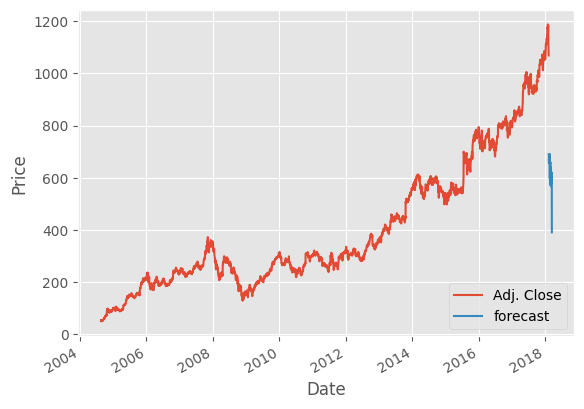

In [24]:
df['Adj. Close'].plot()
df['forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()